In [2]:
!git clone https://github.com/Ashutosh-Vermaa/SilhouetteClustering.git

Cloning into 'SilhouetteClustering'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv("/content/SilhouetteClustering/Customers.csv")

In [4]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
#to be able to visualize the plot, we use 2D data
df= data.iloc[:, 3:5]

In [8]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [9]:
#use elbow method to find optimum number of clusters for k-means
from sklearn.cluster import KMeans
wcss= [] #within cluster sum of squares

for i in range(1, 20):
  kmeans= KMeans(n_clusters= i, init= "k-means++") #k-means++ makes sure that on the onset the centroids are initialized far from each other to avoid wrong grouping 
  kmeans.fit(df)
  wcss.append(kmeans.inertia_) #.inertia_ contains the within cluster sum of squared distance

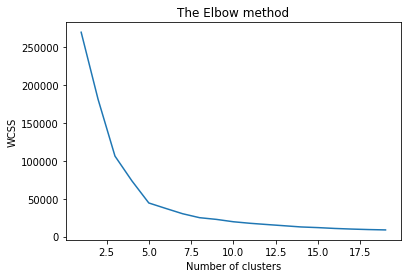

In [10]:
plt.plot(range(1, 20), wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
#we take k=5 as after that, wcss is almost constant
kmeans= KMeans(n_clusters=5)
kmeans.fit(df)
cls= kmeans.fit_predict(df) #this will give the labels assigned to each datapoint

In [20]:
cls

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2,
       1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 3, 4, 2, 4, 3, 4, 3, 4,
       2, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4], dtype=int32)

In [22]:
df[cls==0] #this gives the records that are assigned cluster 0

,Annual Income (k$),Spending Score (1-100)
1,15,81
3,16,77
5,17,76
7,18,94
9,19,72
11,19,99
13,20,77
15,20,79
17,21,66
19,23,98


In [34]:
df['cls']=cls

In [44]:
df

,Annual Income (k$),Spending Score (1-100),cls
0,15,39,1
1,15,81,0
2,16,6,1
3,16,77,0
4,17,40,1
...,...,...,...
195,120,79,4
196,126,28,3
197,126,74,4
198,137,18,3


In [19]:
kmeans.cluster_centers_ #this gives the centroids of the clusters

array([[25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513]])

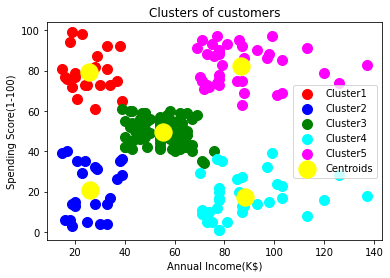

In [43]:
plt.scatter(df[df.cls==0].iloc[:,0],df[df.cls==0].iloc[:,1],s=100,c='red',label='Cluster1') #taking annual income as x and spending as y 
plt.scatter(df[df.cls==1].iloc[:,0],df[df.cls==1].iloc[:,1],s=100,c='blue',label='Cluster2')
plt.scatter(df[df.cls==2].iloc[:,0],df[df.cls==2].iloc[:,1],s=100,c='green',label='Cluster3')
plt.scatter(df[df.cls==3].iloc[:,0],df[df.cls==3].iloc[:,1],s=100,c='cyan',label='Cluster4')
plt.scatter(df[df.cls==4].iloc[:,0],df[df.cls==4].iloc[:,1],s=100,c='magenta',label='Cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()